In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

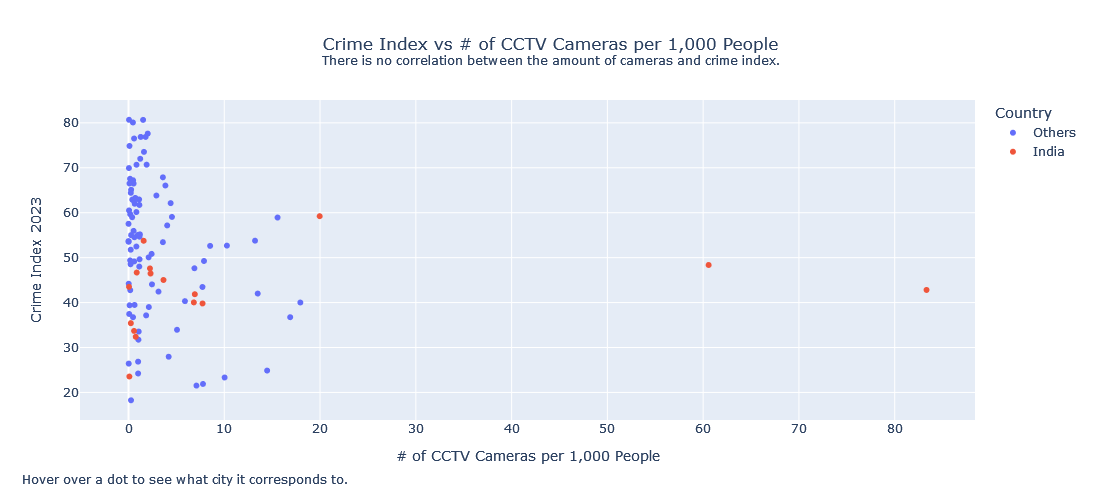

In [3]:
cctv = pd.read_csv("datasets/cctv.csv")

cctv_west = cctv[cctv["Country"] != "China"]

# Define a new column for color based on the condition
cctv_west['color'] = cctv_west['Country'].apply(lambda x: 'orange' if x == 'India' else 'blue')
color_map = {'India': 'orange', 'Other': 'blue'}

# Create the scatterplot
fig = px.scatter(
    cctv_west,
    x='# of CCTV Cameras per 1,000 People',
    y='Crime Index 2023',
    hover_name='City',
    hover_data={'Country': True},
    color = 'color',
    title='Crime Index vs # of CCTV Cameras per 1,000 People<br><sup>There is no correlation between the amount of cameras and crime index.</sup>'
)

# Customize hover label formatting
fig.update_traces(
    hovertemplate='City: %{hovertext}<br>Country: %{customdata[0]}<br>Crime Index: %{x}<br># of CCTV Cameras per 1,000 People: %{y}'
)

fig.update_layout(
    height=500,
    legend_title='Country',
)

newnames = {'blue' : 'Others', 'orange' : 'India'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    #margin={'b': 106, 't': 100}
)

fig.add_annotation(x=-0.07, y=-0.22,
                   xref="paper", yref="paper",
                   align='left',
                   xanchor='left', yanchor='bottom',
                   showarrow=False,
                   text='Hover over a dot to see what city it corresponds to.'
                  )

# Show the plot
fig.show()